In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('darkgrid')

In [6]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


In [8]:
# loop through possible values of alpha and save r scores for each model
lass_r_scores = []
rid_r_scores = []
alphas = []

for var in np.arange(-1,1,0.01):
    lass = linear_model.Lasso(alpha=var)
    lassfit = lass.fit(X_train2, Y_train)
    lass_r_scores.append(lass.score(X_train2, Y_train))

    rid = linear_model.Ridge(alpha=var)
    ridfit = rid.fit(X_train2, Y_train)
    rid_r_scores.append(rid.score(X_train2, Y_train))
    
    alphas.append(var)

c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\halln\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.8647e-26): result may not be accurate.
  overwrite_a=True).T


In [9]:
df = pd.DataFrame(alphas)
df.columns = ['Alphas']
df['Lasso'] = lass_r_scores
df['Ridge'] = rid_r_scores

Text(0, 0.5, 'R^2 Values')

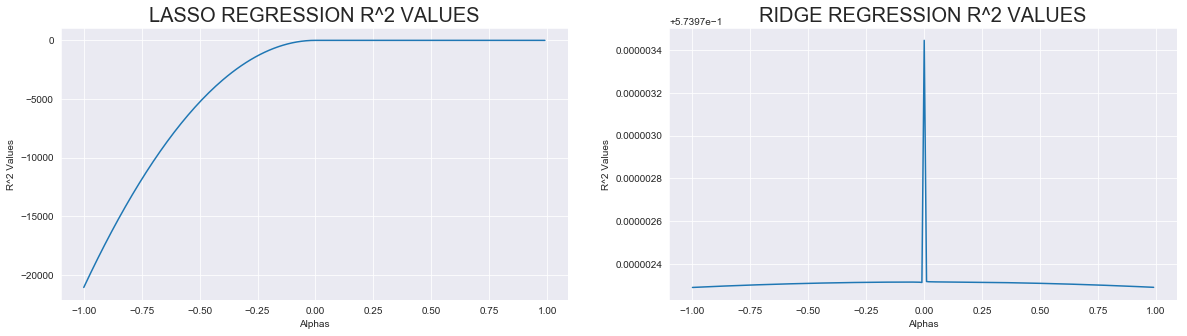

In [10]:
f= plt.figure(figsize=(20,5))
plt.subplot(121)
sns.lineplot(x='Alphas',y='Lasso',data=df)
plt.title("LASSO REGRESSION R^2 VALUES",size=20)
plt.ylabel("R^2 Values")
plt.subplot(122)
sns.lineplot(x='Alphas',y='Ridge',data=df)
plt.title("RIDGE REGRESSION R^2 VALUES",size=20)
plt.ylabel("R^2 Values")

In [11]:
max_lass = np.max(lass_r_scores)
max_rid = np.max(rid_r_scores)
print("Max ridge r score :{} / Max Lasso R Score :{}".format(round(max_rid,10),round(max_lass,10)))

Max ridge r score :0.5739734452 / Max Lasso R Score :0.5739444483
